In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv('..\Superstores\superstore.csv', encoding='latin1')
print(df.head())
df.info()
df.shape
print(df.isnull().sum())

<>:1: SyntaxWarning: invalid escape sequence '\S'
<>:1: SyntaxWarning: invalid escape sequence '\S'
C:\Users\MichaelMingle\AppData\Local\Temp\ipykernel_24880\2645486884.py:1: SyntaxWarning: invalid escape sequence '\S'
  df = pd.read_csv('..\Superstores\superstore.csv', encoding='latin1')


   Row ID        Order ID Order Date Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   08-11-16  11-11-16    Second Class    CG-12520   
1       2  CA-2016-152156   08-11-16  11-11-16    Second Class    CG-12520   
2       3  CA-2016-138688   12-06-16  16-06-16    Second Class    DV-13045   
3       4  US-2015-108966   11-10-15  18-10-15  Standard Class    SO-20335   
4       5  US-2015-108966   11-10-15  18-10-15  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   South  FUR-BO-10001798

In [4]:
# Data Cleaning

# Convert date columns to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

# Extract year and month from 'Order Date'
df['Year'] = df['Order Date'].dt.year
df['YearMonth'] = df['Order Date'].dt.to_period('M')

# Convert numeric columns to appropriate types
numeric_cols = ['Sales', 'Quantity', 'Discount', 'Profit']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Drop rows with missing values in critical columns
df = df.dropna(subset=['Order Date', 'Profit', 'Sales'])

print(df.isnull().sum())
print(df.shape)

#remove duplicates
df.drop_duplicates(inplace=True)



Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
Year             0
YearMonth        0
dtype: int64
(9994, 23)


C:\Users\MichaelMingle\AppData\Local\Temp\ipykernel_24880\3076532815.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Order Date'] = pd.to_datetime(df['Order Date'])
C:\Users\MichaelMingle\AppData\Local\Temp\ipykernel_24880\3076532815.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Ship Date'] = pd.to_datetime(df['Ship Date'])


In [5]:
monthly_revenue = df.groupby('YearMonth')['Sales'].sum().reset_index()
monthly_revenue['YearMonth'] = monthly_revenue['YearMonth'].dt.to_timestamp()
monthly_revenue.head()


,YearMonth,Sales
0,2014-01-01,28953.71
1,2014-02-01,12743.12
2,2014-03-01,54801.96
3,2014-04-01,24710.03
4,2014-05-01,29639.84


In [6]:
monthly_profit = df.groupby('YearMonth')['Profit'].sum().reset_index()
monthly_profit['YearMonth'] = monthly_profit['YearMonth'].dt.to_timestamp()
monthly_profit.head()

,YearMonth,Profit
0,2014-01-01,4549.46
1,2014-02-01,2654.58
2,2014-03-01,92.68
3,2014-04-01,4601.12
4,2014-05-01,3912.23


In [7]:
df['Profit Margin'] = df['Profit'] / df['Sales']
# Cost-to-Revenue Ratio
df['Cost_to_Revenue'] = (df['Sales'] - df['Profit']) / df['Sales']

In [8]:
# 6. Descriptive Statistics
print("\nSummary Statistics:\n", df[numeric_cols].describe())
print("\nAverage Profit Margin:", df['Profit Margin'].mean())
print("\nAverage Cost-to-Revenue Ratio:", df['Cost_to_Revenue'].mean())


Summary Statistics:
               Sales     Quantity     Discount       Profit
count   9994.000000  9994.000000  9994.000000  9994.000000
mean     229.858022     3.789574     0.156203    28.656973
std      623.245131     2.225110     0.206452   234.260203
min        0.440000     1.000000     0.000000 -6599.980000
25%       17.280000     2.000000     0.000000     1.730000
50%       54.490000     3.000000     0.200000     8.665000
75%      209.940000     5.000000     0.200000    29.360000
max    22638.480000    14.000000     0.800000  8399.980000

Average Profit Margin: 0.12031015066796624

Average Cost-to-Revenue Ratio: 0.8796898493320338


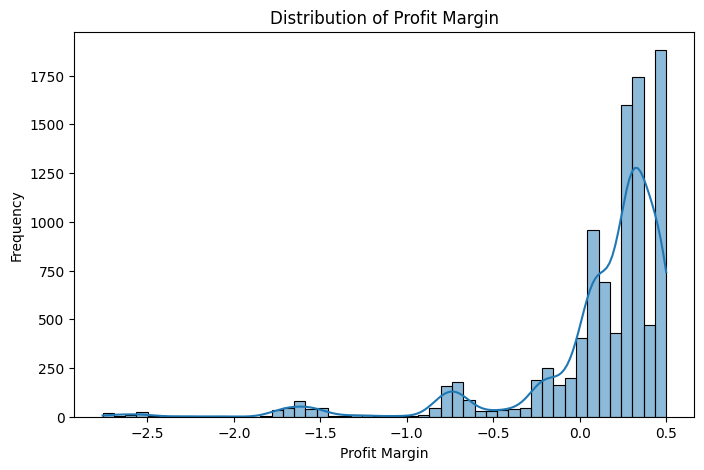

In [9]:
# Univariate Analysis
plt.figure(figsize=(8,5))
sns.histplot(df['Profit Margin'], bins=50, kde=True)
plt.title("Distribution of Profit Margin")
plt.xlabel("Profit Margin")
plt.ylabel("Frequency")
plt.show()

C:\Users\MichaelMingle\AppData\Local\Temp\ipykernel_24880\1418602617.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Category', y='Profit', data=category_profit, palette="viridis")


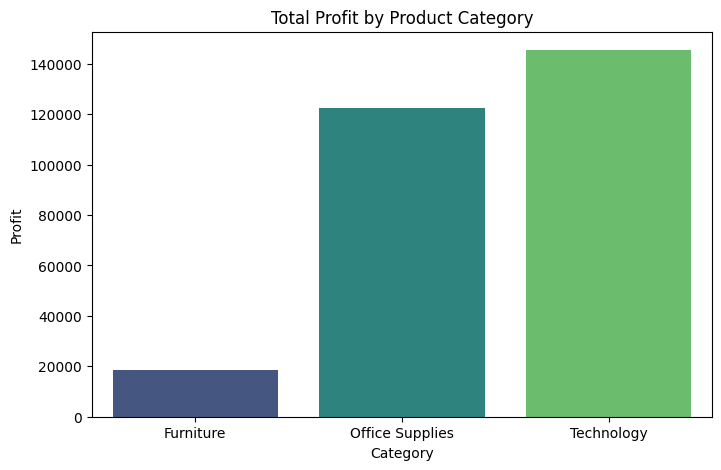

In [10]:
#Profitability by Category
plt.figure(figsize=(8,5))
category_profit = df.groupby('Category')['Profit'].sum().reset_index()
sns.barplot(x='Category', y='Profit', data=category_profit, palette="viridis")
plt.title("Total Profit by Product Category")
plt.show()

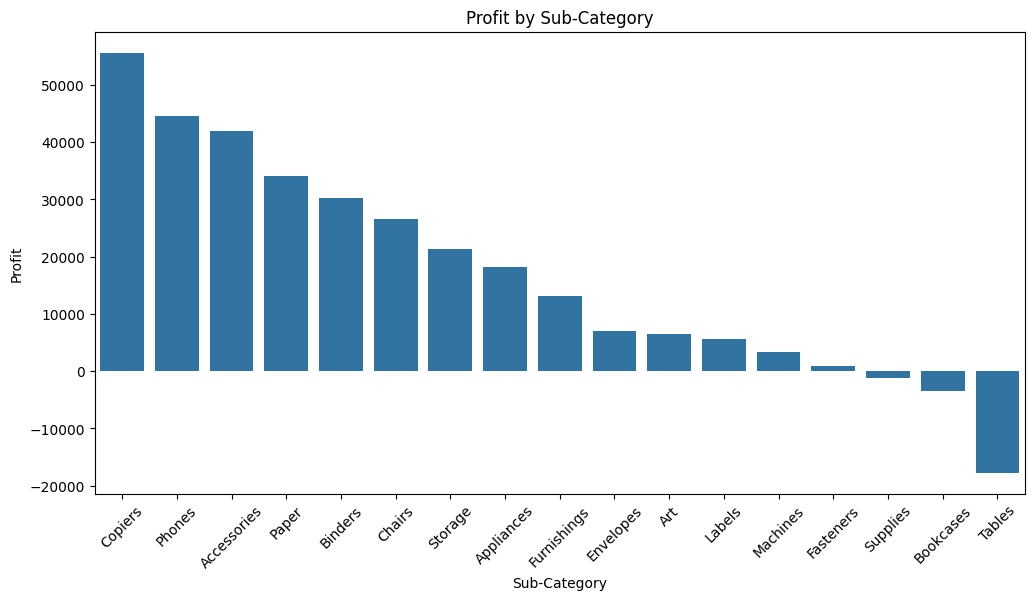

In [11]:
# Profitability by Sub-Category
plt.figure(figsize=(12,6))
subcategory_profit = df.groupby('Sub-Category')['Profit'].sum().reset_index()
sns.barplot(x='Sub-Category', y='Profit', data=subcategory_profit.sort_values('Profit', ascending=False))
plt.title("Profit by Sub-Category")
plt.xticks(rotation=45)
plt.show()

C:\Users\MichaelMingle\AppData\Local\Temp\ipykernel_3544\1414603912.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Segment', y='Profit', data=segment_profit, palette="coolwarm")


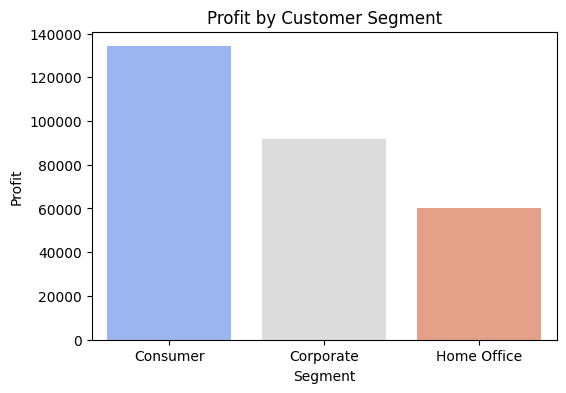

In [10]:
# Customer Segment Analysis
plt.figure(figsize=(6,4))
segment_profit = df.groupby('Segment')['Profit'].sum().reset_index()
sns.barplot(x='Segment', y='Profit', data=segment_profit, palette="coolwarm")
plt.title("Profit by Customer Segment")
plt.show()

C:\Users\MichaelMingle\AppData\Local\Temp\ipykernel_7272\1675313397.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Region', y='Profit', data=region_profit, palette="muted")


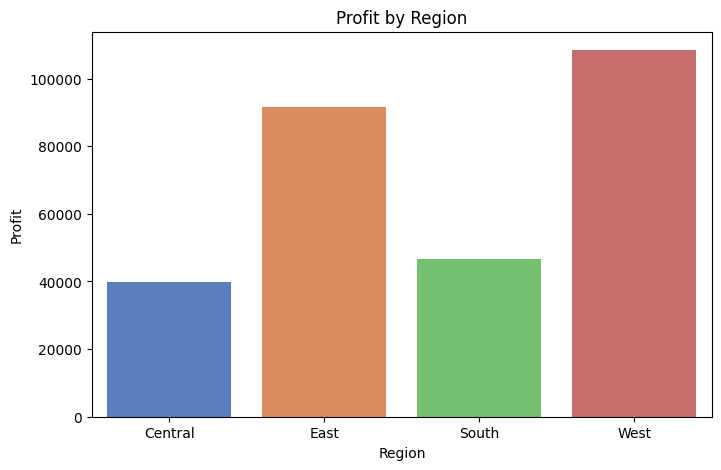

In [13]:
# Regional Analysis
plt.figure(figsize=(8,5))
region_profit = df.groupby('Region')['Profit'].sum().reset_index()
sns.barplot(x='Region', y='Profit', data=region_profit, palette="muted")
plt.title("Profit by Region")
plt.show()

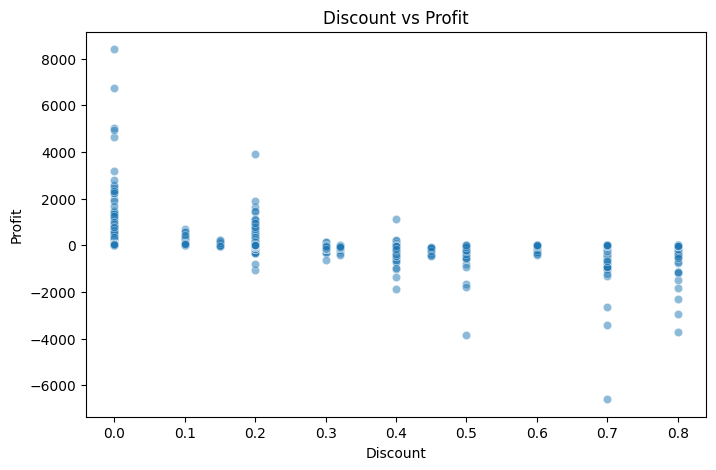


Correlation between Discount and Profit: -0.21948771072705198


In [11]:
# Discount vs Profit (Correlation Check)
plt.figure(figsize=(8,5))
sns.scatterplot(x='Discount', y='Profit', data=df, alpha=0.5)
plt.title("Discount vs Profit")
plt.show()

print("\nCorrelation between Discount and Profit:", df['Discount'].corr(df['Profit']))

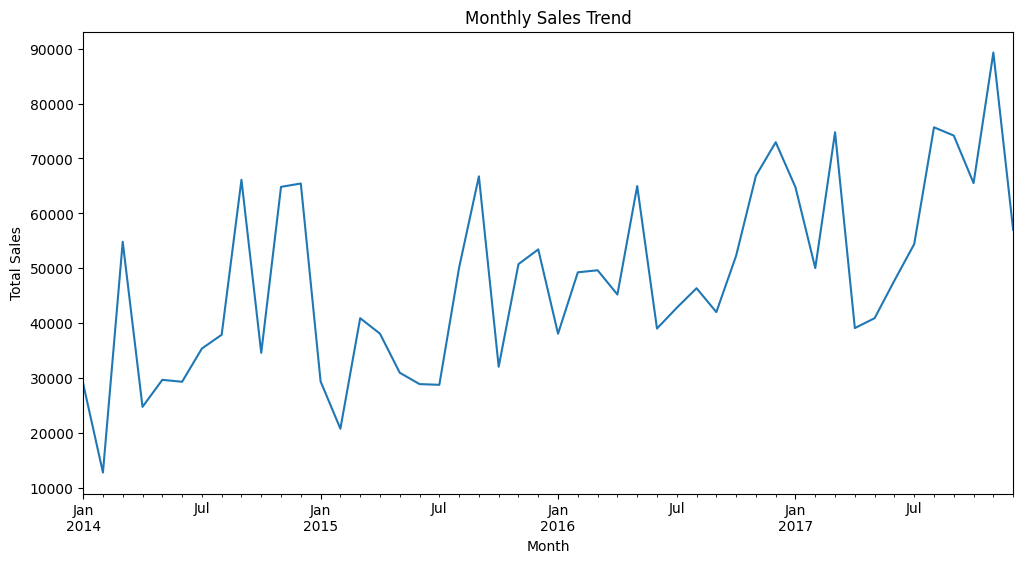

In [12]:
# Time Series Analysis: Revenue Trend
monthly_sales = df.groupby('YearMonth')['Sales'].sum()
plt.figure(figsize=(12,6))
monthly_sales.plot()
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.show()

C:\Users\MichaelMingle\AppData\Local\Temp\ipykernel_7272\868378594.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Ship Mode', y='Profit', data=shipmode_profit, palette="pastel")


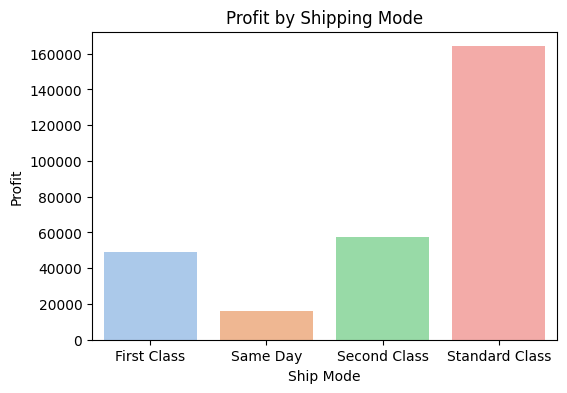

In [16]:
# 1. Profitability by Shipping Mode
plt.figure(figsize=(6,4))
shipmode_profit = df.groupby('Ship Mode')['Profit'].sum().reset_index()
sns.barplot(x='Ship Mode', y='Profit', data=shipmode_profit, palette="pastel")
plt.title("Profit by Shipping Mode")
plt.show()


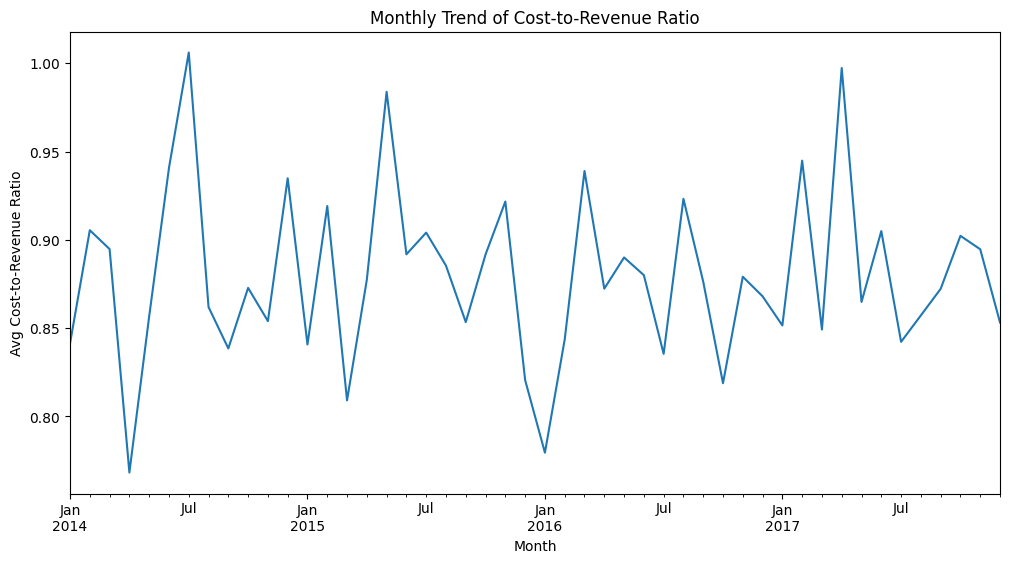

In [13]:
# 2. Cost-to-Revenue Ratio Trend Over Time
cost_ratio_trend = df.groupby('YearMonth')['Cost_to_Revenue'].mean()
plt.figure(figsize=(12,6))
cost_ratio_trend.plot()
plt.title("Monthly Trend of Cost-to-Revenue Ratio")
plt.xlabel("Month")
plt.ylabel("Avg Cost-to-Revenue Ratio")
plt.show()

In [14]:
#Top 10 Customers by Profit
top_customers_profit = (df.groupby('Customer Name')[['Sales','Profit']].sum().sort_values(by='Profit', ascending=False))
top_customers_profit.head(10)

,Sales,Profit
Customer Name,,
Tamara Chand,19052.22,8981.32
Raymond Buch,15117.35,6976.09
Sanjit Chand,14142.34,5757.42
Hunter Lopez,12873.30,5622.43
Adrian Barton,14473.57,5444.81
Tom Ashbrook,14595.62,4703.80
Christopher Martinez,8954.01,3899.91
Keith Dawkins,8181.24,3038.58
Andy Reiter,6608.45,2884.61


C:\Users\MichaelMingle\AppData\Local\Temp\ipykernel_7272\1924498789.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Customer Name', y='Profit', data=top_customers_profit.head(10), palette="magma")


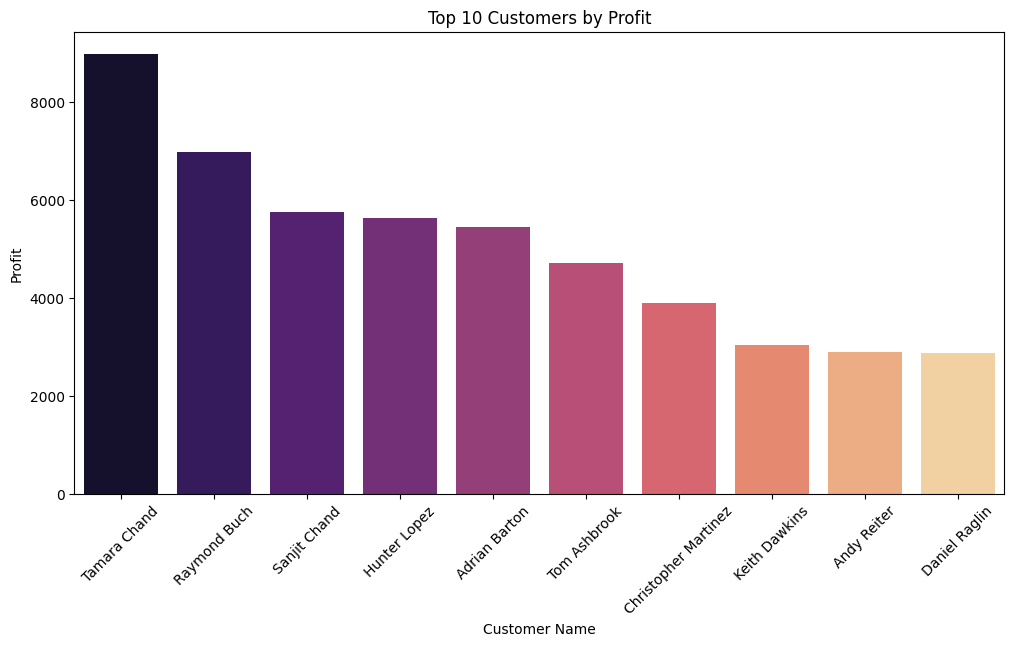

In [22]:
plt.figure(figsize=(12,6))
sns.barplot(x='Customer Name', y='Profit', data=top_customers_profit.head(10), palette="magma")
plt.title("Top 10 Customers by Profit")
plt.xticks(rotation=45)
plt.show()

In [13]:
import plotly.express as px
import plotly.graph_objects as go

segment_profit = df.groupby("Segment", as_index=False)["Profit"].sum()
fig5 = px.pie(segment_profit, values="Profit", names="Segment", title="Profit Share by Segment", hole=0.4)
fig5.show()

In [14]:
category_summary = df.groupby("Category", as_index=False).agg({"Sales":"sum","Profit":"sum"})
fig4 = go.Figure(data=[
    go.Bar(name="Sales", x=category_summary["Category"], y=category_summary["Sales"]),
    go.Bar(name="Profit", x=category_summary["Category"], y=category_summary["Profit"])
])
fig4.update_layout(barmode="group", title="Sales and Profit by Category")
fig4.show()

In [15]:
region_cost_rev = df.groupby("Region", as_index=False)["Cost_to_Revenue"].mean()
fig2 = px.bar(region_cost_rev, x="Region", y="Cost_to_Revenue",
              title="Average Cost-to-Revenue Ratio by Region",
              text_auto=".2f", color="Cost_to_Revenue", 
              color_continuous_scale="plasma")
fig2.show()